In [1017]:
#Importing essentials libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import altair as alt
from sklearn.linear_model import LinearRegression

In [1018]:
# Reading Data and understanding Data

data = pd.read_csv("Data Analysis - PivotTable format.csv")
data["Headcount"]=data["Headcount"].str.replace(',','', regex=True)

In [1019]:
#Renaming a column

data.rename(columns={"PT/FT": "Type"}, inplace = True)

# 1) Trends over time in male and female employment, including any notable changes

In [1020]:
data.head(10)

,Cluster,Agency,Year,Type,Gender,Headcount
0,Education,Education Agency 1,2014,Full-Time,Female,180
1,Education,Education Agency 2,2014,Full-Time,Female,2463
2,Education,Education Agency 3,2014,Full-Time,Female,32
3,Education,Education Agency 4,2014,Full-Time,Female,39251
4,Family & Community Services,Family & Community Services Agency 1,2014,Full-Time,Female,9817
5,Family & Community Services,Family & Community Services Agency 2,2014,Full-Time,Female,44
6,Family & Community Services,Family & Community Services Agency 3,2014,Full-Time,Female,82
7,"Finance, Services & Innovation","Finance, Services & Innovation Agency 1",2014,Full-Time,Female,3205
8,"Finance, Services & Innovation","Finance, Services & Innovation Agency 2",2014,Full-Time,Female,308
9,Health,Health Agency 1,2014,Full-Time,Female,76


In [1021]:
#changing Datatype

data.Headcount = data.Headcount.apply(pd.to_numeric, errors="coerce")

year = [2014, 2015, 2016, 2017, 2018]
M = []
F = []
FT_M = []
PT_M = []
FT_F = []
PT_F = []

for i in year:
    M.append(data.Headcount[(data.Year == i) & (data.Gender == "Male")].sum())
    F.append(data.Headcount[(data.Year == i) & (data.Gender == "Female")].sum())

for i in year:
    FT_M.append(data.Headcount[(data.Year == i) & (data.Type == "Full-Time") & (data.Gender == "Male")].sum())
    PT_M.append(data.Headcount[(data.Year == i) & (data.Type == "Part-Time") & (data.Gender == "Male")].sum())
    FT_F.append(data.Headcount[(data.Year == i) & (data.Type == "Full-Time") & (data.Gender == "Female")].sum())
    PT_F.append(data.Headcount[(data.Year == i) & (data.Type == "Part-Time") & (data.Gender == "Female")].sum())
    
for i in range(0,5):
    print("Number of Total Male Employees in", year[i], "are", M[i])
print("-"*35)  
for i in range(0, 5):
    print("Total Full-Time Male employees in", year[i], "are", FT_M[i])
print("-"*35)   
for i in range(0, 5):
     print("Total Part-Time Male employees in", year[i], "are", PT_M[i])
print("-"*35)   
print("-"*35)   
for i in range(0,5):
    print("Number of Total Female Employees in", year[i], "are", F[i])
print("-"*35)   
for i in range(0, 5):
    print("Total Full-Time Female employees in", year[i], "are", FT_F[i])
print("-"*35)   
for i in range(0, 5):   
    print("Total Part-Time Female employees in", year[i], "are", PT_F[i])
print("-"*35)   

Number of Total Male Employees in 2014 are 137609
Number of Total Male Employees in 2015 are 132806
Number of Total Male Employees in 2016 are 132654
Number of Total Male Employees in 2017 are 133668
Number of Total Male Employees in 2018 are 133411
-----------------------------------
Total Full-Time Male employees in 2014 are 123614
Total Full-Time Male employees in 2015 are 118504
Total Full-Time Male employees in 2016 are 117976
Total Full-Time Male employees in 2017 are 114962
Total Full-Time Male employees in 2018 are 111377
-----------------------------------
Total Part-Time Male employees in 2014 are 13995
Total Part-Time Male employees in 2015 are 14302
Total Part-Time Male employees in 2016 are 14678
Total Part-Time Male employees in 2017 are 18706
Total Part-Time Male employees in 2018 are 22034
-----------------------------------
-----------------------------------
Number of Total Female Employees in 2014 are 244776
Number of Total Female Employees in 2015 are 241981
Number 

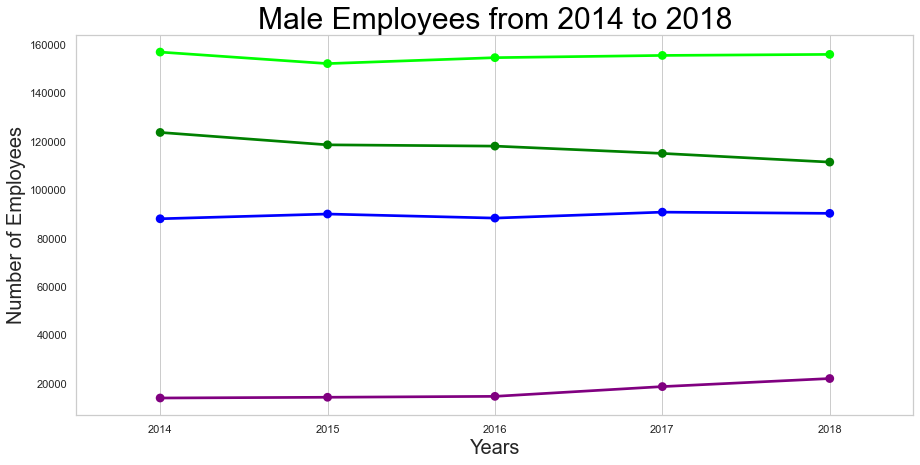

In [1022]:
# Visualization of number of emploees 

f,ax = plt.subplots(figsize =(15,7))
sns.pointplot(x= year, y = FT_M, color="green", alpha=0.8)
sns.pointplot(x= year, y = FT_F, color="lime", alpha=0.8)
sns.pointplot(x= year, y = PT_M, color="purple", alpha=0.8)
sns.pointplot(x= year, y = PT_F, color="blue", alpha=0.8)

plt.title('Male Employees from 2014 to 2018',fontsize = 30,color='black')
plt.xlabel("Years", fontsize = 20)
plt.ylabel("Number of Employees", fontsize =20)

plt.grid()
plt.show()  

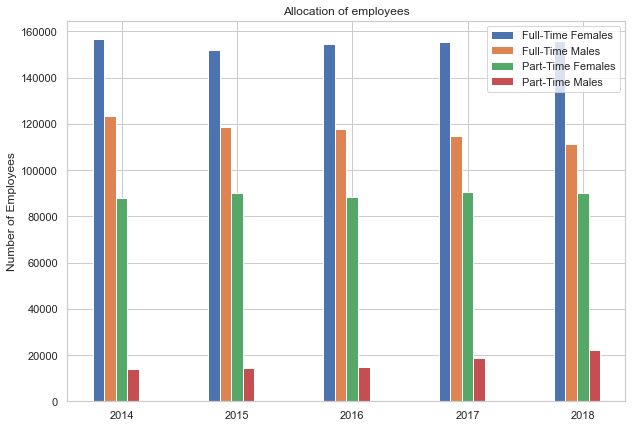

In [1023]:
width = 0.10
x = np.arange(len(year))
fig, ax = plt.subplots(figsize=(10,7))
ax_1 =  ax.bar(x - 0.2,FT_F, width, label="Full-Time Females")
ax_2 =  ax.bar(x - 0.1,FT_M, width, label="Full-Time Males")
ax_3 =  ax.bar(x + 0, PT_F, width, label="Part-Time Females")
ax_4 =  ax.bar(x + 0.1,PT_M, width, label="Part-Time Males")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Number of Employees")
ax.set_title("Allocation of employees")
ax.set_xticks(x)
ax.set_xticklabels(year)
ax.legend()
plt.show()

1.2684081091138544 Full-Time Female Employee over 1 Male employee in 2014
1.282977789779248 Full-Time Female Employee over 1 Male employee in 2015
1.3094951515562487 Full-Time Female Employee over 1 Male employee in 2016
1.3518206015900907 Full-Time Female Employee over 1 Male employee in 2017
1.3991488368334575 Full-Time Female Employee over 1 Male employee in 2018


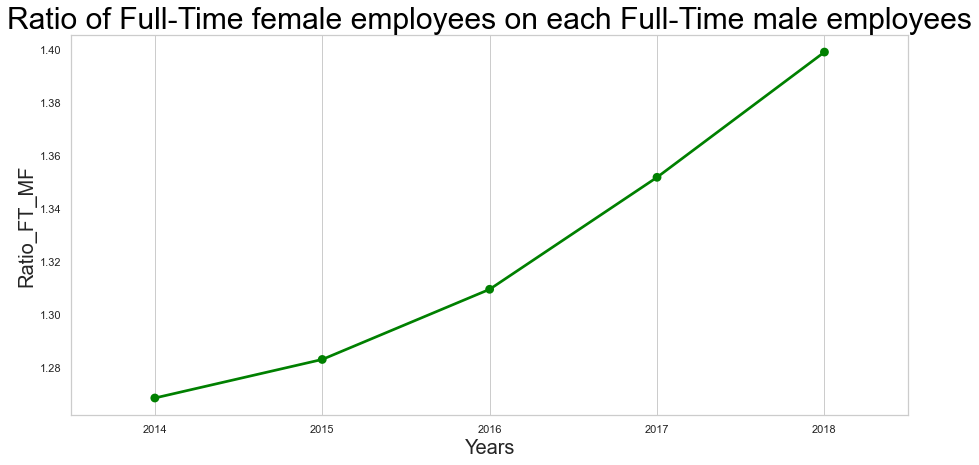

In [1024]:
# trend of female over male full-time employees 

Ratio_FT_MF= []
emp_year = 2014
for a, b in zip(FT_M, FT_F):
    Ratio_FT_MF.append(b/a)
    print(b/a, "Full-Time Female Employee over 1 Male employee in", emp_year)
    emp_year += 1
f,ax1 = plt.subplots(figsize =(15,7))
sns.pointplot(x= year, y = Ratio_FT_MF, color="green", alpha=0.8)

plt.title("Ratio of Full-Time female employees on each Full-Time male employees",fontsize = 30,color="black")
plt.xlabel("Years", fontsize = 20)
plt.ylabel("Ratio_FT_MF", fontsize =20)
plt.grid()
plt.show()

Increasing number of part-time male employees are below
-------------------------
Year
2014    13995
2015    14302
2016    14678
2017    18706
2018    22034
Name: Headcount, dtype: int64
-------------------------


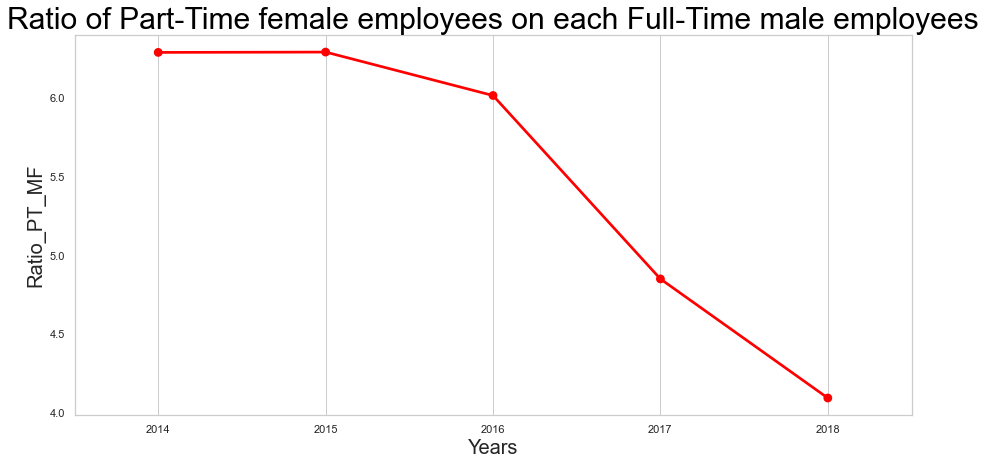

In [1025]:
# trend of female over male part-time employees 

mal = data[(data.Gender == "Male") & (data.Type == "Part-Time")]
print("Increasing number of part-time male employees are below")
print("-"*25)
print(mal.groupby("Year")["Headcount"].sum())
print("-"*25)

Ratio_PT_MF= []
emp_year = 2014
for a, b in zip(PT_M, PT_F):
    Ratio_PT_MF.append(b/a)
#     print(b/a, "Female Employee on each Male employee in", emp_year)
    emp_year += 1
f,ax1 = plt.subplots(figsize =(15,7))
sns.pointplot(x= year, y = Ratio_PT_MF, color="red", alpha=0.8)

plt.title("Ratio of Part-Time female employees on each Full-Time male employees",fontsize = 30,color='black')
plt.xlabel("Years", fontsize = 20)
plt.ylabel("Ratio_PT_MF", fontsize =20)
plt.grid()
plt.show()

## Observations: 
    •	Full-time female employees contributing the highest in all sectors, followed by full-time male employees. 
    •	Number of part-time female employees is significantly high as compare to part-time males employees. However, the number of part-time male employees has been increasing since 2015.  
    •	Ratio of full-time female employees over full-time male employees has been increasing due to decreasing in full-time male employment. 
    •	Ratio of part-time female employees over part-time male employees has been decreasing due to increase in part-time male employment. 


# 2) The current representation of part time employees in the sector and in each Cluster

                          cluster    emp
3                          Health  48500
0                       Education  47939
5                         Justice   5021
8                       Transport   4343
2  Finance, Services & Innovation   2058
6          Planning & Environment   1553
1     Family & Community Services   1512
4                        Industry    813
7               Premier & Cabinet    363
9                        Treasury    148


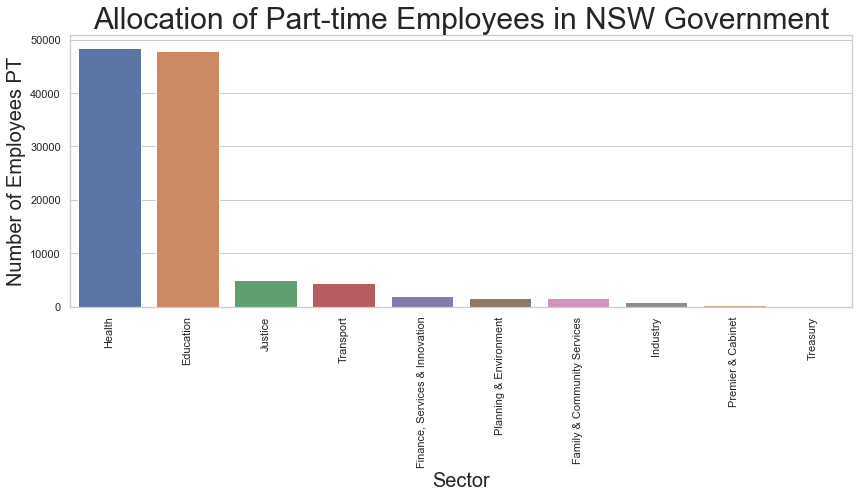

In [1026]:
# Since we dont have current data, we will be using the latest data which is 2018

cluster_items = list(data.Cluster.unique())
cluster_employees_pt = []
cluster_employees_ft = []

for item in cluster_items:
    x = data.Headcount[(data.Cluster == item) & (data.Type == "Part-Time") & (data.Year == 2018)]
    y = data.Headcount[(data.Cluster == item) & (data.Year == 2018)]
    cluster_employees_pt.append(x.sum())
    cluster_employees_ft.append(y.sum())
    
data1 = pd.DataFrame({"cluster" : cluster_items, "emp" : cluster_employees_pt})
sortx= data1.sort_values(by="emp", ascending=False)
print(sortx)
    
plt.figure(figsize=(14,5))
sns.barplot(x= sortx.cluster, y= sortx.emp)                              
plt.ylabel("Number of Employees PT", fontsize=20)
plt.xlabel("Sector", fontsize=20)
plt.title("Allocation of Part-time Employees in NSW Government", fontsize=30)
plt.xticks(rotation=90)
plt.show()

## Observations: 
    •	The above graph represents the allocation of part-time employees in each cluster. 
    •	86% part-time employees work in Health and Education sector. 

# 3) The current representation of male and female part time employees as a proportion of the respective male and the female workforce in the sector and in each cluster

In [1027]:
cluster_items
year = [2014, 2015, 2016, 2017, 2018]

total_rep = []
male_rep = []
female_rep = []

x = data[(data.Year == 2018) & (data.Type == "Part-Time") & (data.Gender == "Male")]
y = data[(data.Year == 2018) & (data.Type == "Part-Time") & (data.Gender == "Female")]
z = data[(data.Year == 2018) & (data.Type == "Part-Time")]
for i in cluster_items:
    xx = x.Headcount[data.Cluster == i].sum()
    yy = y.Headcount[data.Cluster == i].sum()
    zz = z.Headcount[data.Cluster == i].sum()
    print("Part-Time male Employees in", i, "sector in 2018 are", xx)
    print("Part-Time female Employees in", i, "sector in 2018 are", yy)
    print("")
    
    total_rep.append(zz)
    male_rep.append(xx) 
    female_rep.append(yy)


Part-Time male Employees in Education sector in 2018 are 8783
Part-Time female Employees in Education sector in 2018 are 39156

Part-Time male Employees in Family & Community Services sector in 2018 are 113
Part-Time female Employees in Family & Community Services sector in 2018 are 1399

Part-Time male Employees in Finance, Services & Innovation sector in 2018 are 690
Part-Time female Employees in Finance, Services & Innovation sector in 2018 are 1368

Part-Time male Employees in Health sector in 2018 are 7498
Part-Time female Employees in Health sector in 2018 are 41002

Part-Time male Employees in Industry sector in 2018 are 114
Part-Time female Employees in Industry sector in 2018 are 699

Part-Time male Employees in Justice sector in 2018 are 1447
Part-Time female Employees in Justice sector in 2018 are 3574

Part-Time male Employees in Planning & Environment sector in 2018 are 302
Part-Time female Employees in Planning & Environment sector in 2018 are 1251

Part-Time male Employe

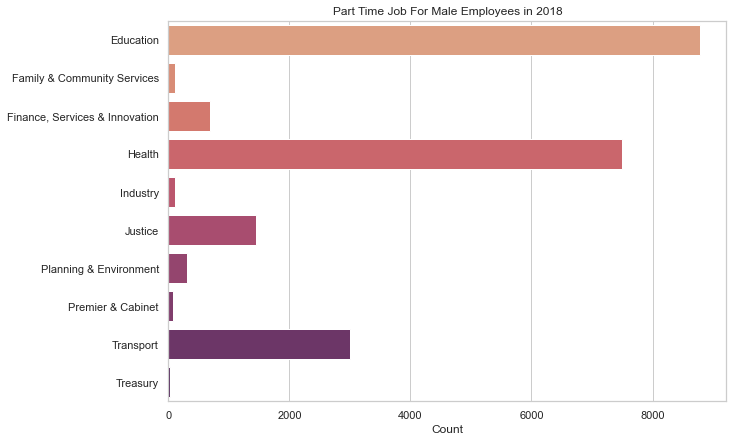

In [1028]:
ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(x= male_rep, y= cluster_items, palette="flare")
ax.set_title("Part Time Job For Male Employees in 2018")
ax.set_xlabel("Count")
plt.show()

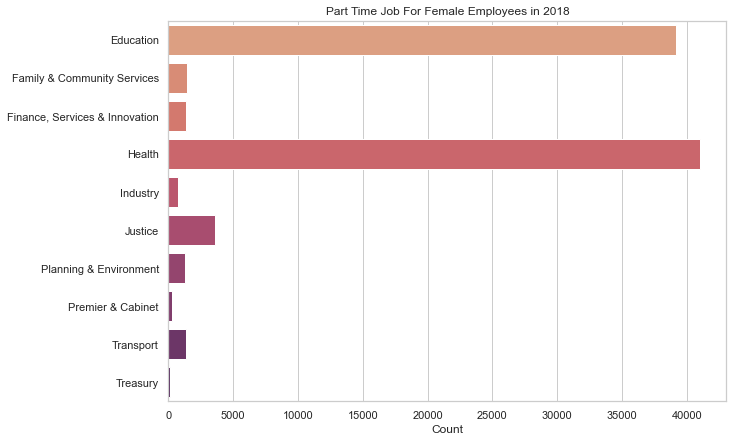

In [1029]:
ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(x= female_rep, y= cluster_items, palette="flare")
ax.set_title("Part Time Job For Female Employees in 2018")
ax.set_xlabel("Count")
plt.show()

                          cluster     emp
3                          Health  146312
0                       Education  108454
5                         Justice   47498
8                       Transport   30524
4                        Industry   12202
6          Planning & Environment   10947
1     Family & Community Services   10676
2  Finance, Services & Innovation    8518
7               Premier & Cabinet    2810
9                        Treasury    1519


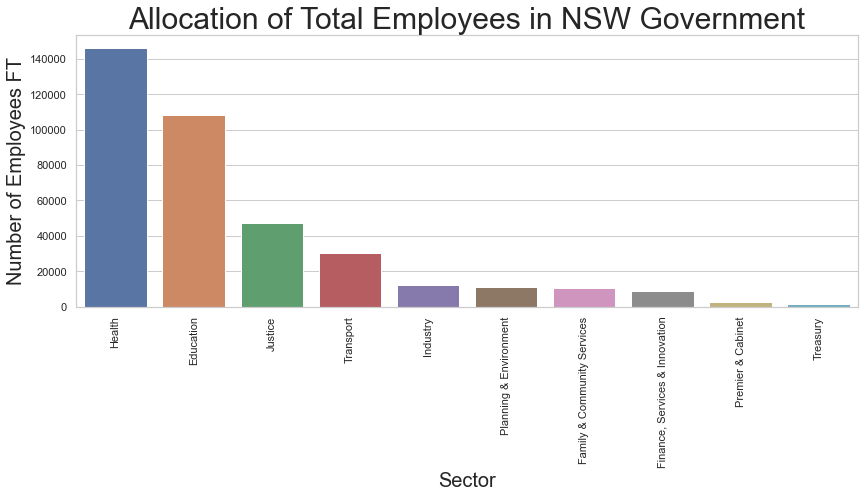

In [1030]:
# Number of Full-Time employees in each sector

data2 = pd.DataFrame({"cluster" : cluster_items, "emp" : cluster_employees_ft})
sorty= data2.sort_values(by="emp", ascending=False)

print(sorty)

plt.figure(figsize=(14,5))
sns.barplot(x= sorty.cluster, y= sorty.emp)                              
plt.ylabel("Number of Employees FT", fontsize=20)
plt.xlabel("Sector", fontsize=20)
plt.title("Allocation of Total Employees in NSW Government", fontsize=30)
plt.xticks(rotation=90)
plt.show()


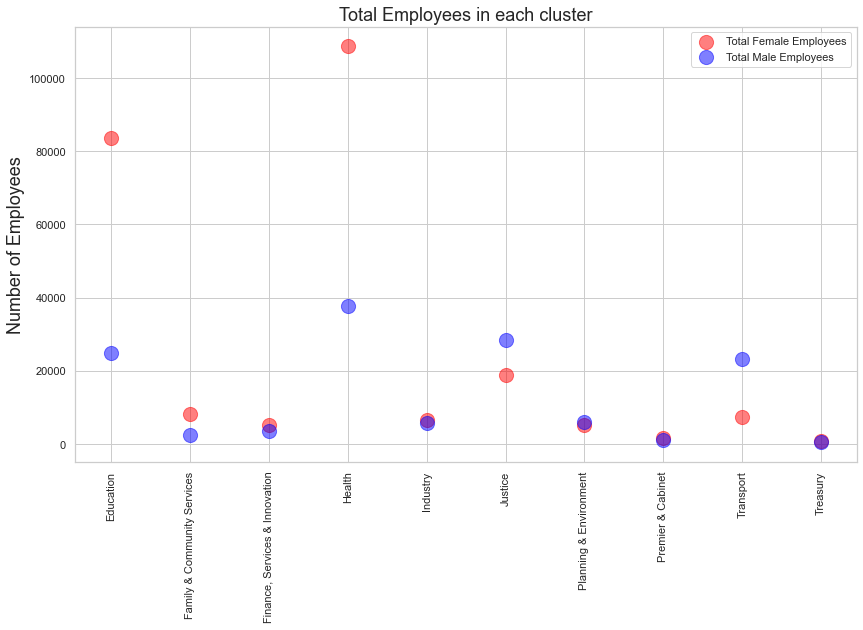

In [1031]:
current_rep_pt = data[(data.Year == 2018)]
x = current_rep_pt.groupby(["Cluster", "Gender"], as_index=False)["Headcount"].sum()
# print(x.to_string())

x_clu = x.Cluster[(x.Gender == "Female")]
x_fem = x.Headcount[(x.Gender == "Female")]
x_mal = x.Headcount[(x.Gender == "Male")]

fig,ax = plt.subplots(figsize=(14,8))
ax.scatter(x_clu, x_fem , color= "red", s = 200, alpha = 0.5, label = "Total Female Employees")
ax.scatter(x_clu, x_mal , color= "blue", s = 200, alpha = 0.5, label = "Total Male Employees")
ax.set_ylabel("Number of Employees", fontsize=18)
plt.title("Total Employees in each cluster", fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Observations: 
    •	The above two graph shows the current representation of males and females part-time employees in each sector. 
    •	The bar chart shows the total representation of employees in NSW Government. 
    •	The third picture shows the number of total males and females employees in each cluster. 
 


# 4) Change in these two above statistics over the last 4 years

In [1032]:
total_rep_gender = data.groupby(["Cluster", "Year", "Gender"], as_index=False)["Headcount"].sum()
print(total_rep_gender.head(10))

     Cluster  Year  Gender  Headcount
0  Education  2014  Female      77475
1  Education  2014    Male      24256
2  Education  2015  Female      78006
3  Education  2015    Male      23424
4  Education  2016  Female      81406
5  Education  2016    Male      23832
6  Education  2017  Female      82387
7  Education  2017    Male      24541
8  Education  2018  Female      83603
9  Education  2018    Male      24851


In [1033]:
new_table = pd.DataFrame(columns=["Cluster","Male change","Female change","Male Percentage","Female Percentage"])
new_table

total_rep = data[(data.Year == 2018)]
t = total_rep.groupby(["Cluster", "Gender"], as_index=False)["Headcount"].sum()
print(t.head(10)) 

                          Cluster  Gender  Headcount
0                       Education  Female      83603
1                       Education    Male      24851
2     Family & Community Services  Female       8267
3     Family & Community Services    Male       2409
4  Finance, Services & Innovation  Female       5062
5  Finance, Services & Innovation    Male       3456
6                          Health  Female     108662
7                          Health    Male      37650
8                        Industry  Female       6438
9                        Industry    Male       5764


In [1034]:
n = 0
nn = 0
for i in range(len(cluster_items)):
    if int(total_rep_gender.iloc[0, 3:4]) < int(total_rep_gender.iloc[n+8, 3:4]):
        new_table.loc[i,0:1] = cluster_items[nn]
        new_table.loc[i,2:3] = "Increased"
    else:
        new_table.loc[i,0:1] = cluster_items[nn]
        new_table.loc[i,2:3] = "Decreased"
               
    if int(total_rep_gender.iloc[n+1, 3:4]) < int(total_rep_gender.iloc[n+9, 3:4]):
        new_table.iloc[i, 1:2] = "Increased"
    else:
        new_table.iloc[i, 1:2] = "Decresed"
            
    n += 10
    nn += 1
        
a = 0
b = 1
for i in range(len(cluster_items)):
    new_table.loc[i,4:5] = (t.Headcount[a] / (t.Headcount[a] + t.Headcount[a + 1]))*100
    new_table.loc[i,3:4] = (t.Headcount[b] / (t.Headcount[a] + t.Headcount[a +1]))*100
    a +=2
    b +=2
    
new_table

,Cluster,Male change,Female change,Male Percentage,Female Percentage
0,Education,Increased,Increased,22.9139,77.0861
1,Family & Community Services,Decresed,Decreased,22.5646,77.4354
2,"Finance, Services & Innovation",Decresed,Decreased,40.5729,59.4271
3,Health,Increased,Increased,25.7327,74.2673
4,Industry,Decresed,Decreased,47.2382,52.7618
5,Justice,Increased,Decreased,60.0509,39.9491
6,Planning & Environment,Increased,Decreased,53.7316,46.2684
7,Premier & Cabinet,Increased,Decreased,40.2847,59.7153
8,Transport,Increased,Decreased,75.8158,24.1842
9,Treasury,Decresed,Decreased,39.6313,60.3687


## Observations: 

    •The above table compare the male and female employment between 2014 and 2018 and state whether the number of male/female employees has increased or decreased in each cluster.
    •The above table also provide the information about male and female employment proportion in each cluster.


In [1035]:
y = data.groupby(['Cluster',"Year"], as_index = False)["Headcount"].sum()
print(y.head(10))

                       Cluster  Year  Headcount
0                    Education  2014     101731
1                    Education  2015     101430
2                    Education  2016     105238
3                    Education  2017     106928
4                    Education  2018     108454
5  Family & Community Services  2014      20656
6  Family & Community Services  2015      20351
7  Family & Community Services  2016      15885
8  Family & Community Services  2017      15514
9  Family & Community Services  2018      10676


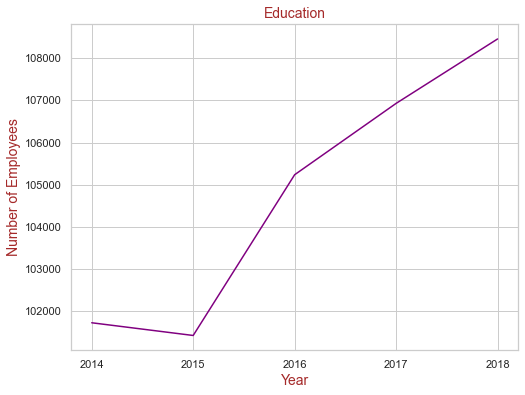

Education


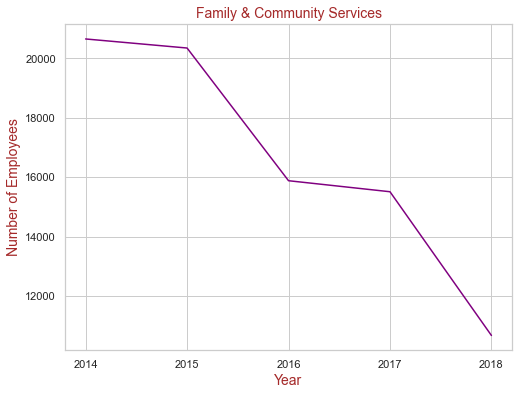

Family & Community Services


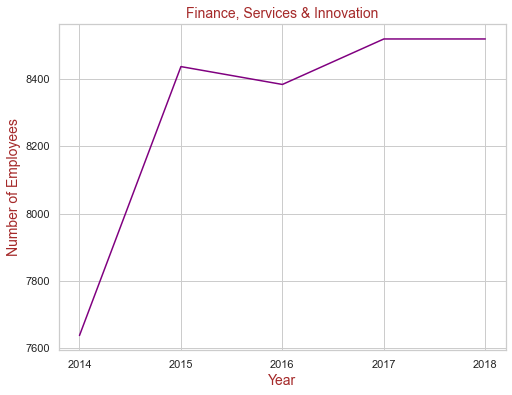

Finance, Services & Innovation


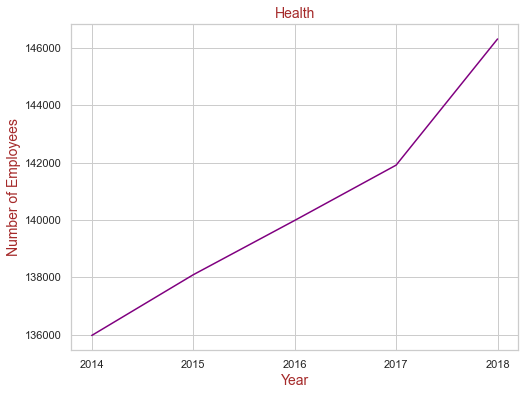

Health


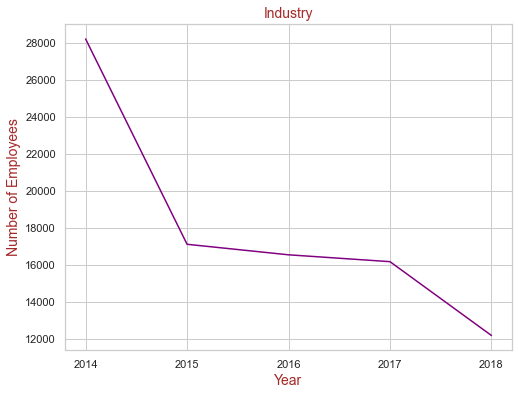

Industry


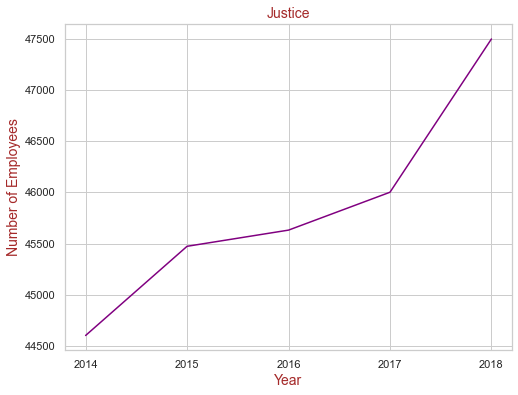

Justice


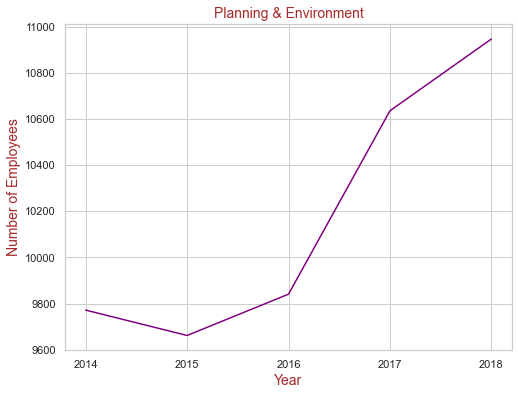

Planning & Environment


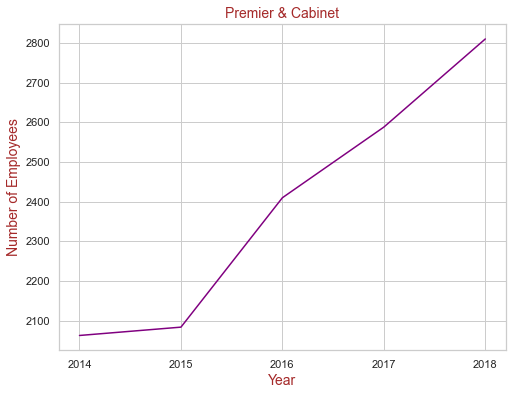

Premier & Cabinet


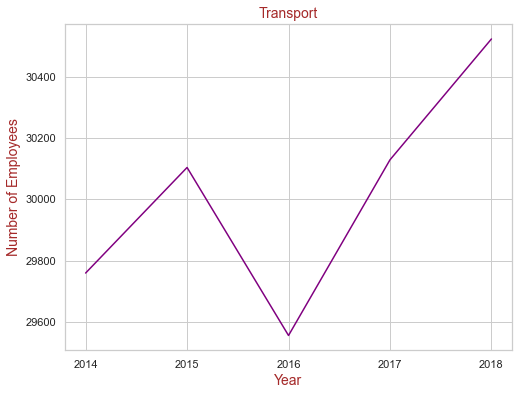

Transport


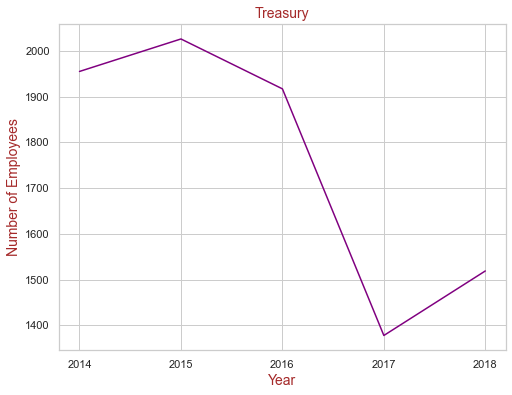

Treasury


In [1036]:
n = 0 
for item in cluster_items:
    x_lab =  y.iloc[n,0]
    display_df = y.loc[n:n+4]
    
    fig,ax = plt.subplots(figsize=(8, 6))
    ax = sns.lineplot(x = display_df["Year"], y = display_df["Headcount"], color = "purple")
    ax.set_title(x_lab,fontsize=14, color = "brown")
    ax.set_xlabel("Year",fontsize=14, color = "brown")
    ax.set_ylabel( "Number of Employees",fontsize=14, color = "brown")
    plt.xticks(ticks = year)
    plt.show()
    print(y.iloc[n,0])
    n += 5

# 5) Projection of what the representation will be by 2025 if the current trends continue

Predicted numbers from 2019 to 2025
-------------------------
[[108881.8]
 [106080.2]
 [103278.6]
 [100477. ]
 [ 97675.4]
 [ 94873.8]
 [ 92072.2]]


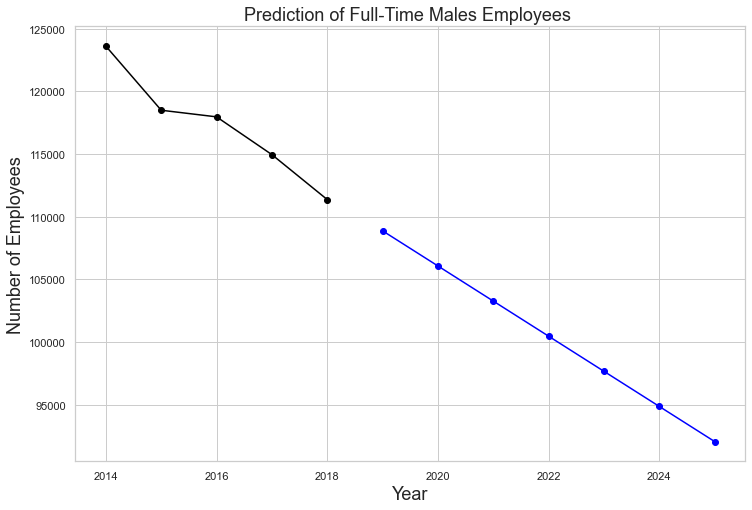

In [1037]:
# Full-Time Male Forecast

future = [2019,2020,2021,2022,2023,2024,2025]
X = Trend_FT_M.iloc[:, 0].values.reshape(-1, 1)
Y = Trend_FT_M.iloc[:, 1].values.reshape(-1, 1)

genius_regression_model = LinearRegression()
genius_regression_model.fit(X,Y)
predict = genius_regression_model.predict([[2019],[2020],[2021],[2022],[2023],[2024],[2025]])
print("Predicted numbers from 2019 to 2025")
print("-"*25)
print(predict)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(future, predict , color=col, marker="o")
ax.plot(year, FT_M , color= "black", marker="o")
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Number of Employees", fontsize=18)
plt.title("Prediction of Full-Time Males Employees ", fontsize=18)
plt.show()

Predicted numbers from 2019 to 2025
-------------------------
[[155347.2]
 [155492.2]
 [155637.2]
 [155782.2]
 [155927.2]
 [156072.2]
 [156217.2]]


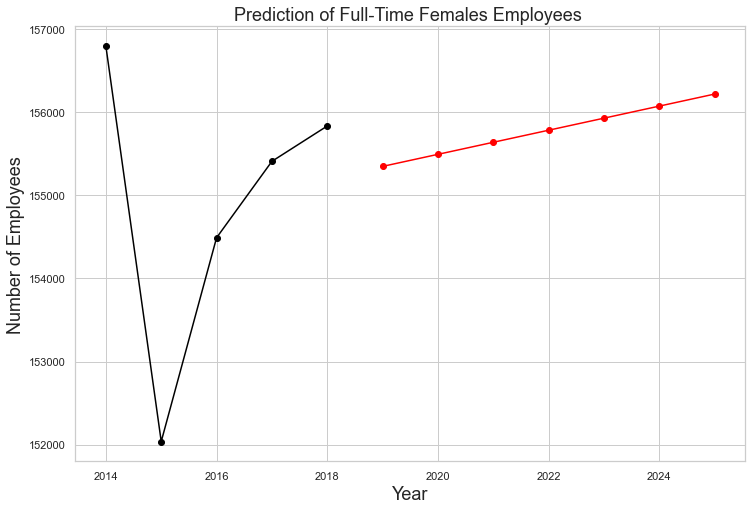

In [1038]:
# Full-Time Female Forecast

future = [2019,2020,2021,2022,2023,2024,2025]
X = Trend_FT_F.iloc[:, 0].values.reshape(-1, 1)
Y = Trend_FT_F.iloc[:, 1].values.reshape(-1, 1)

genius_regression_model = LinearRegression()
genius_regression_model.fit(X,Y)
predict = genius_regression_model.predict([[2019],[2020],[2021],[2022],[2023],[2024],[2025]])
print("Predicted numbers from 2019 to 2025")
print("-"*25)
print(predict)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(future, predict , color= "red", marker="o")
ax.plot(year, FT_F , color= "black", marker="o")
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Number of Employees", fontsize=18)
plt.title("Prediction of Full-Time Females Employees ", fontsize=18)
plt.show()

Predicted numbers from 2019 to 2025
-------------------------
[[22887.6]
 [24935.8]
 [26984. ]
 [29032.2]
 [31080.4]
 [33128.6]
 [35176.8]]


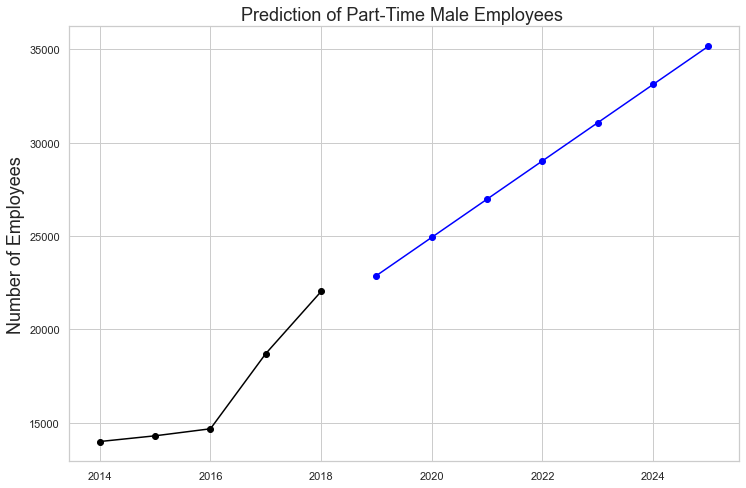

In [1039]:
# Part-Time Male Forecast

future = [2019,2020,2021,2022,2023,2024,2025]
X = Trend_PT_M.iloc[:, 0].values.reshape(-1, 1)
Y = Trend_PT_M.iloc[:, 1].values.reshape(-1, 1)

genius_regression_model = LinearRegression()
genius_regression_model.fit(X,Y)
predict = genius_regression_model.predict([[2019],[2020],[2021],[2022],[2023],[2024],[2025]])
print("Predicted numbers from 2019 to 2025")
print("-"*25)
print(predict)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(future, predict , color=col, marker="o")
ax.plot(year, PT_M , color= "black", marker="o")
ax.set_ylabel("Number of Employees", fontsize=18)
plt.title("Prediction of Part-Time Male Employees ", fontsize=18)
plt.show()

Predicted numbers from 2019 to 2025
-------------------------
[[90998.6]
 [91523. ]
 [92047.4]
 [92571.8]
 [93096.2]
 [93620.6]
 [94145. ]]


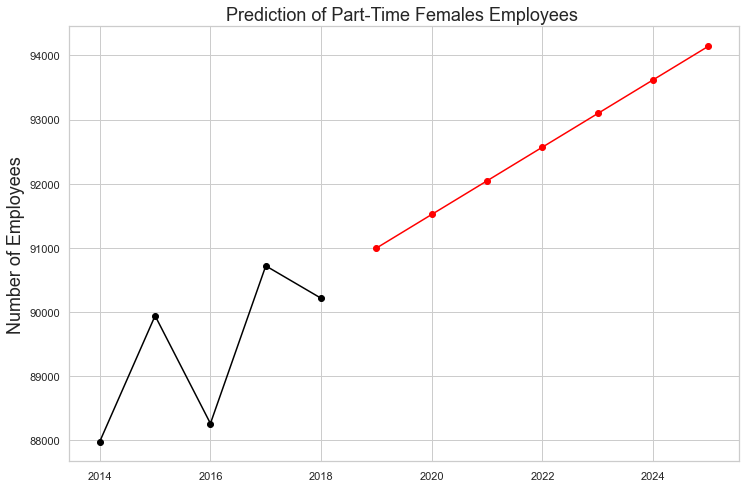

In [1040]:
# Part-Time Male Forecast

future = [2019,2020,2021,2022,2023,2024,2025]
X = Trend_PT_F.iloc[:, 0].values.reshape(-1, 1)
Y = Trend_PT_F.iloc[:, 1].values.reshape(-1, 1)

genius_regression_model = LinearRegression()
genius_regression_model.fit(X,Y)
predict = genius_regression_model.predict([[2019],[2020],[2021],[2022],[2023],[2024],[2025]])
print("Predicted numbers from 2019 to 2025")
print("-"*25)
print(predict)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(future, predict , color= "red", marker="o")
ax.plot(year, PT_F , color= "black", marker="o")
ax.set_ylabel("Number of Employees", fontsize=18)
plt.title("Prediction of Part-Time Females Employees ", fontsize=18)
plt.show()

#### Note: I tried the Arima model to predict the number of employees but due to lack of data the model was providing the inaccurate predictions. I then use simple linear regression to predict the changes.  



## Observations: 
    •   Female employment, be it part-time or full-time, will be increased by 2025.
    •   The part-time male employment will increase as per current trend and there will be 35000 employees working in NSW Government by 2025. 
    •   It could be due to above reason, the Full-Time male employment will decrease and there will be around 17000 less employees working in NSW Government by 2025. 